# 8.3 Lab: Decision Trees - Part A
This lab replaces the Lab session in Section 8.3 of the book "[An Introduction to Statistical Learning](https://www.statlearning.com/)". We ad With additional inputs from [DataCamp](https://www.datacamp.com/community/tutorials/decision-tree-classification-python).

This lab has the following sections:
1. Fitting Decision Trees for classification
2. Visualizing and interpreting Decision Trees
3. Hyper-parameters of Decision Trees and prunning
4. Hyper-parameter Tuning in Decision Trees with Cross-Validation



In [2]:
!pip install -q --upgrade pip matplotlib graphviz scikit-learn

import pandas as pd

from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## 1. Fitting Classification Trees

To study the fitting of classification trees, we will use an example case study. We will use a public dataset from [kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) and induce decision trees with scikit-learn to address this challenge.

### About the case study
> Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?



**Context**  
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**  
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The list of attributes is:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)


## Load the data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. 

Below we download the dataset from public gist, and then load the corresponding CSV file.

In [50]:
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv", header=0, comment='#')

In [51]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Select features
Here, you need to split given columns into two types of variables dependent (or target variable $y$) and independent variable (or feature variables $X$).

In [66]:
feature_cols = pima.columns.tolist()[:-1]

X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

# TODO print the "shape" of X and y. 
# Result should be X:(N, F) y:(N,) with N being the number of samples and F the number of features

print(X.shape, "\n", y.shape)

(768, 8) 
 (768,)


### Split data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

TODO: split the dataset by using function `train_test_split`, as below. Use the [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from scikit-learn

In [74]:
# TODO import train_test_splits
from sklearn.model_selection import train_test_split


# TODO split X and y into X_train, X_test, y_train, y_test with a 70% training and 30% test split
# set the random_state=1 for consistency to the solution (but other random states should be fine too but produde slightly different numbers)

X_train, X_test = train_test_split(X, test_size=0.3, random_state=1)
y_train, y_test = y[X_train.index], y[X_test.index]

### Create and train a Decision Tree model

We will use the `DecisionTreeClassifier` class from the sklearn package, that creates a decision tree for classification tasks. The full documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), but do not dive into it yet! We will discover most of it by coding below.

First we will create a Decision Tree, with the default hyper-parameters, train it and make prediction on the test test split.

In [75]:
# TODO Import the DecisionTreeClassifier from scikit-learn (sklearn)
from sklearn.tree import DecisionTreeClassifier

# TODO Instantiate a DecisionTreeClassifier object with random_state 0
dtc = DecisionTreeClassifier(random_state=0)

# TODO Train with the training dataset X_train,y_train with .fit()
dtc_fit = dtc.fit(X_train, y_train)

#Predict the response y_pred for test dataset X_test with .predict()
y_pred = dtc.predict(X_test)

Next, we will evaluate how accurately the classifier model has predicted the labels in the test set.

Accuracy can be computed by comparing actual test set values and predicted values. Using the `accuracy_score` we see how often the decision tree is correct. 

The `confusion_matrix` is also useful for classification problems. scikit-learn offers a nice visualization for confusion matrices. 

You can find both functions in the [`sklearn.metrics` module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [230]:
# TODO Import the accuracy_score and confusion_matrix functions from scikit learn
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
# Model Accuracy, how often is the classifier correct?print("Accuracy:", accuracy_score(y_test, y_pred))

# TODO implement your own accuracy metric by calculating the average of correct predictions
# hint you can test if elements of vectors A and B are equal with "A==B" and you can calculate the average of all elements in a vector with .mean()
from collections import Counter



def bootstrap_accuracy(model, n_rounds, X, y):
    accs = []
    for n in range(n_rounds):
        resample = np.random.choice(X.index, size=len(X.index), replace=True)
        Xr_train, Xr_test = X.iloc[resample, :], X.drop(resample)
        yr_train, yr_test = y[resample], y.drop(resample)
        dtc_fit = model.fit(Xr_train, yr_train)
        yr_pred = dtc_fit.predict(Xr_test)
        score = Counter(yr_test == yr_pred)
        trues, _ = score.values()
        acc = trues / score.total()
        accs.append(acc)

    return np.array(accs)
    
    



    

In [220]:
a,b = Counter(y_pred == y_test).values()

<Axes: ylabel='Count'>

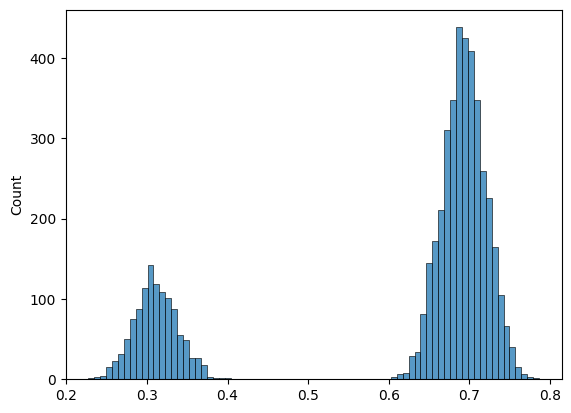

In [233]:
sns.histplot(bootstrap_accuracy(dtc, 5000, X, y))

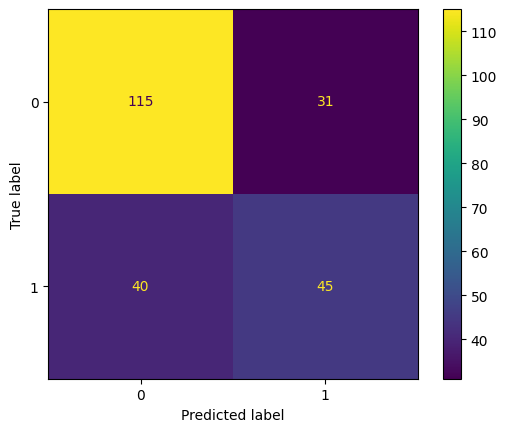

In [234]:
# TODO Import the confusion_matrix function and the ConfusionMatrixDisplay class from scikit learn metrics
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [235]:
115/231

0.49783549783549785

The model has a classification accuracy of 69.2%. Not a bad result, considering that we have used the default hyperparameters.
You can improve this metric further by tuning the hyper-parameters of the Decision Tree model.

> **Discussion question**
>
> In the example above, is the classification accuracy of nearly 70% a good one? Explain why.
> Hint: look at the confusion matrix



## 2. Visualizing Decision Trees

First, lets check the depth of the decision tree induced, and the number of leaves it has. 

We will be using the methods `get_depth`, and `get_n_leaves` of the decision tree classifier


In [239]:
# TODO Print the depth of the tree
print(dtc_fit.get_depth())
print(dtc_fit.get_n_leaves())
# Hint, you can get a list of all member variables and functions with dir(model)



12
92


> **Discussion question**
>
> Is this tree rather complex or simple? What are the benefits and downsides of a complex tree over a simple tree given the training and test set. Bonus Point: Discuss the terms bias and variance.



Next, we will visualize the decision tree. The `export_text()` function returns the tree in a textual form: shows the variables that are used as internal nodes in the tree and the labels assigned to the terminal nodes.

**Note, in the code below, we call the Decision Tree object `dtc` (DecisionTreeClassifier), but you may have called it differently above**

In [241]:
# Tree node count (internal nodes + leaf nodes):
print(tree.export_text(dtc_fit, feature_names=feature_cols))

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |--- BMI <= 45.40
|   |   |   |   |--- BMI <= 30.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  30.90
|   |   |   |   |   |--- BloodPressure <= 55.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  55.00
|   |   |   |   |   |   |--- Glucose <= 124.50
|   |   |   |   |   |   |   |--- BMI <= 31.80
|   |   |   |   |   |   |   |   |--- Glucose <= 102.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Glucose >  102.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- BMI >  31.80
|   |   |   |   |   |   |   |   |--- SkinThickness <= 26.00
|   |   |   |   |   |   |   |   |   |--- SkinThickness <= 24.00
|   |   |   |   |   |   |   |   |   |   |--- Glucose <= 112.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Gluc

Using the `plot_tree` function, we can visualize the tree, its nodes and leaves, along with several metrics per node.

After executing the code below, double-click on the image, and you can zoom in!

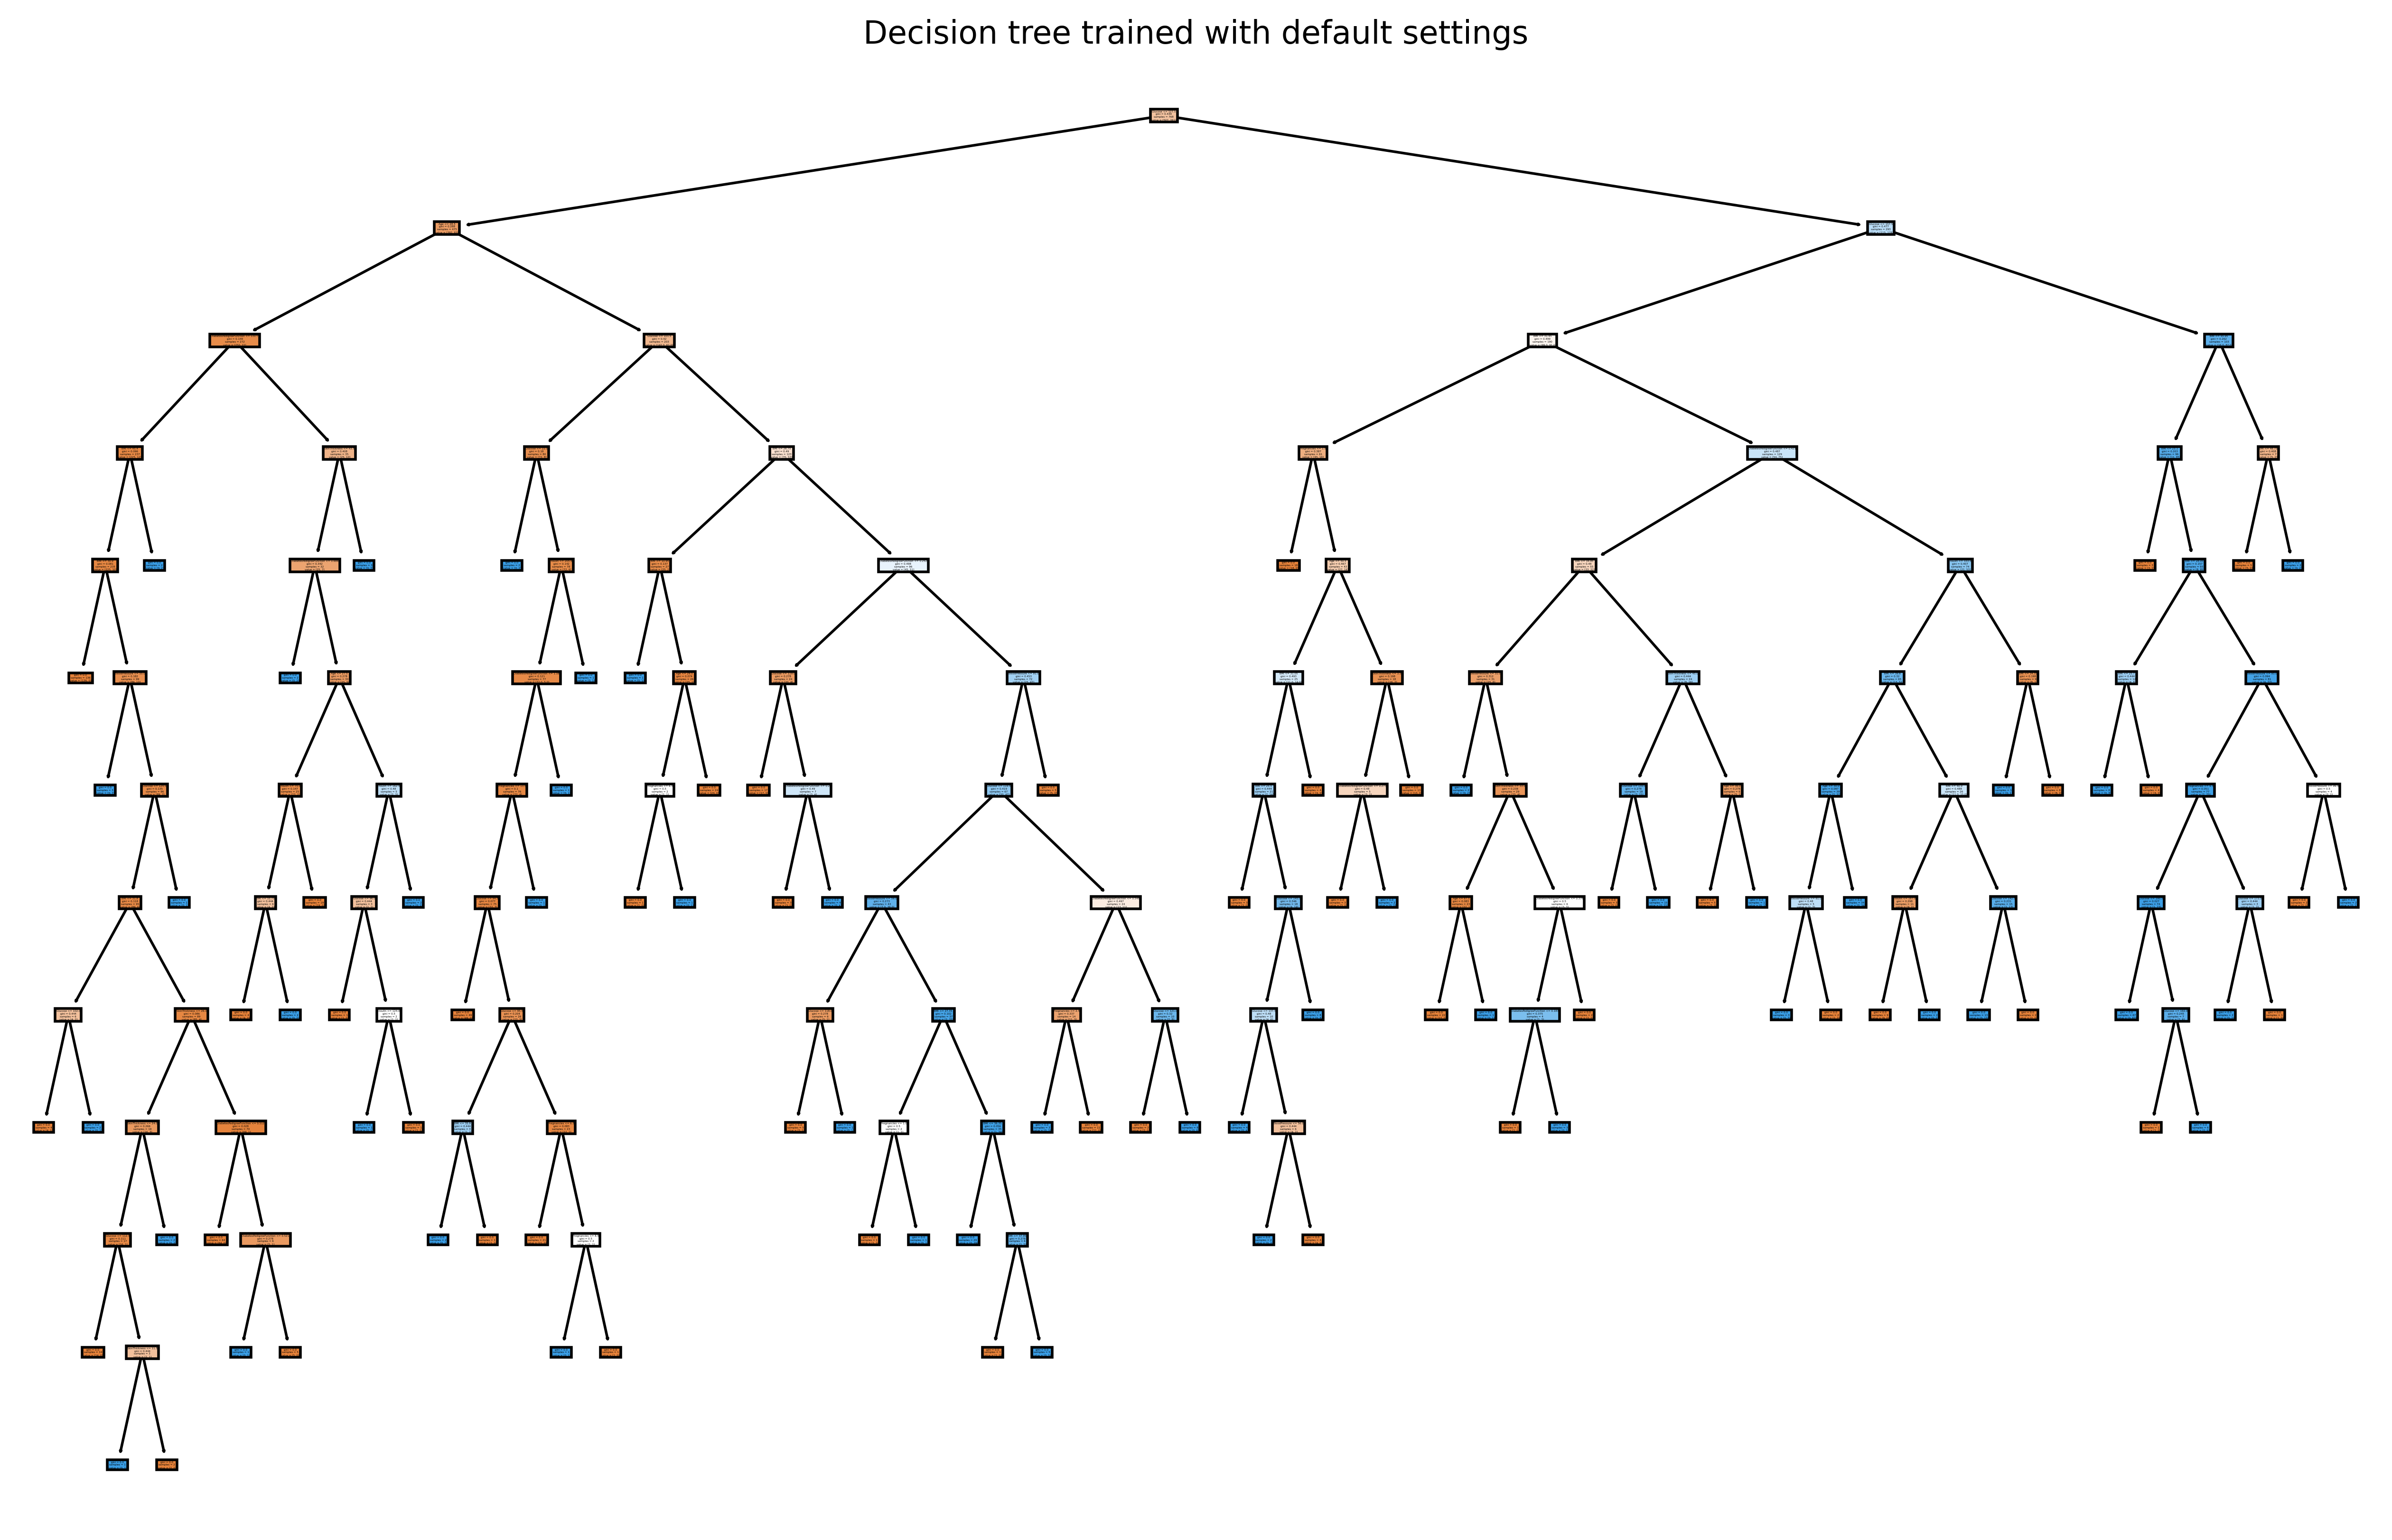

In [242]:
plt.figure(figsize=(16,10), dpi=400)
tree.plot_tree(dtc, filled=True, feature_names=X_train.columns)
plt.title("Decision tree trained with default settings")
plt.show()

Below we zoom in to the visaul of a tree node. It shows
- the feature on which the split was performed, and the split criterion (in this case `glucose < 129.5`)
- the measure of node impurity, in this case the gini index (which was 0.449)
- the number of samples in this node (537), and
- the fraction of samples corresponding to all classes. In this case, 354 were to class 0, and 183 to class 1.
As the majority is with Class 0, had this been a terminal node (leaf), then that would be the label predicted by this tree.



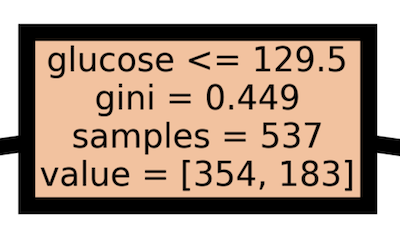

> **Discussion Question**
>
> Inspect the leaves of the decision tree above. 
> - How pure are the tree leaves? 
> - What is their gini index?
> - How many data points support each leaf?
>
> - Does this look like overfitting?

## 3. Inference in Decision Trees

We can inspect the imporance of the features of the decision tree. 

We can access the feature importances via `feature_importances_`. We will add them in a dataframe and  them in a data frame and visualize it!

In [245]:
#TODO print the feature importance of each input feature by calling the .feature_importances_ variable within your trained decision tree
pd.DataFrame(dtc_fit.feature_importances_, feature_cols)

,0
Pregnancies,0.042222
Glucose,0.392744
BloodPressure,0.079531
SkinThickness,0.045291
Insulin,0.045218
BMI,0.218133
DiabetesPedigreeFunction,0.108431
Age,0.068430


> **Discussion Question**
>
> TODO: What feature is most important? What feature is least important?

<Axes: xlabel='Importance', ylabel='None'>

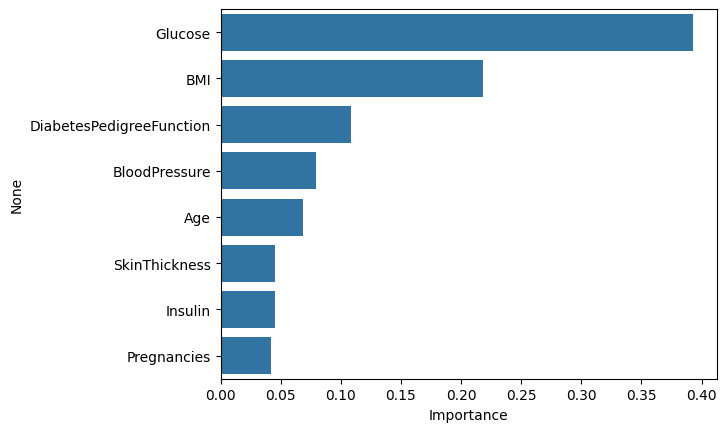

In [246]:
# Add them to a dataframe, together with the names of the columns. 
# Sort for convenience
fi = pd.DataFrame(data=dtc.feature_importances_, index=X.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

# And visualize
sns.barplot(data=fi, x="Importance", y=fi.index)

> **Discussion Question**
>
> - How do you interpret the feature importance plot?
> - Does it relate with the decision tree visualization?

The most important features (`glucose`, and `bmi`) appear in the top branches of the decision tree. The least important features as `insulin` are less often used, and mostly at bottom branches.


## 4. Decision tree hyper parameters and prunning

Below are some of the hyper-parameters of the `DecisionTreeClassifier`, that allow prunning while creating it.

- `criterion`: The function to measure the quality of a split. Supported criteria are `"gini"` for the Gini impurity (default) and `"entropy"` for the information gain.
- `max_depth`: The maximum depth of the tree. If None (default), then nodes are expanded until  all leaves are pure or until all leaves contain less than  `min_samples_split` samples.
- `min_samples_split`  The minimum number of samples required to split an internal node. (default=2)
- `min_samples_leaf` The minimum number of samples required to be at a leaf node. (default=1)
- `max_leaf_nodes` Grow a tree with ``max_leaf_nodes`` in best-first fashion.
- `ccp_alpha` Cross complexity prunning - alpha, prunes the weakest branches of the tree

We can tweak the hyperparameters to effectively prune the decision tree.

**Example**  
Train and evaluate a Decision Tree, that does not have more than 15 leaf nodes.

**TODO** Try different values for `max_leaf_nodes` and observe the training and testing accuracy

Train Accuracy: 0.8230912476722533
Test Accuracy: 0.7575757575757576


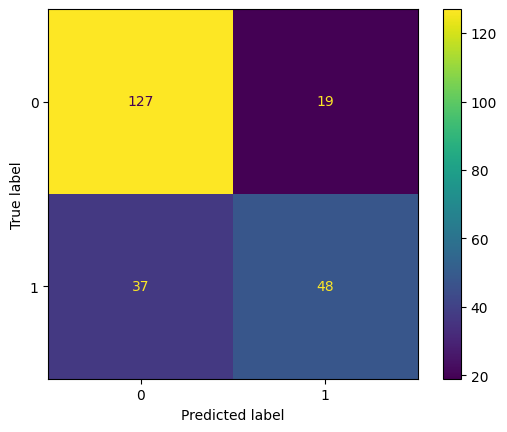

In [249]:
# Create Decision Tree classifer object
dt2 = DecisionTreeClassifier(max_leaf_nodes = 15, random_state=0)

# Train with the training dataset
dt2.fit(X_train,y_train)
y_pred_train = dt2.predict(X_train)


#Predict the response for test dataset
y_pred = dt2.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [258]:
acc1 = bootstrap_accuracy(dtc, 1000, X, y)
acc2 = bootstrap_accuracy(dt2, 1000, X, y)

<Axes: ylabel='Count'>

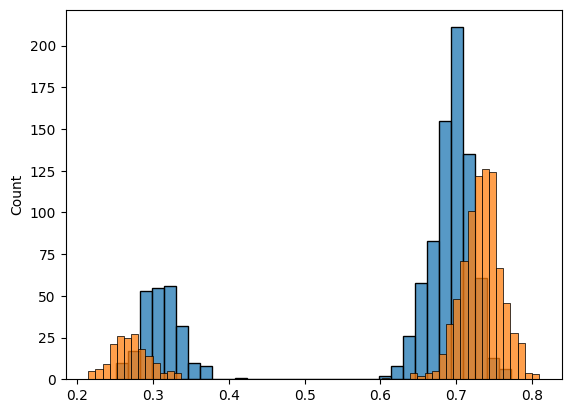

In [263]:
sns.histplot(acc1)
sns.histplot(acc2)

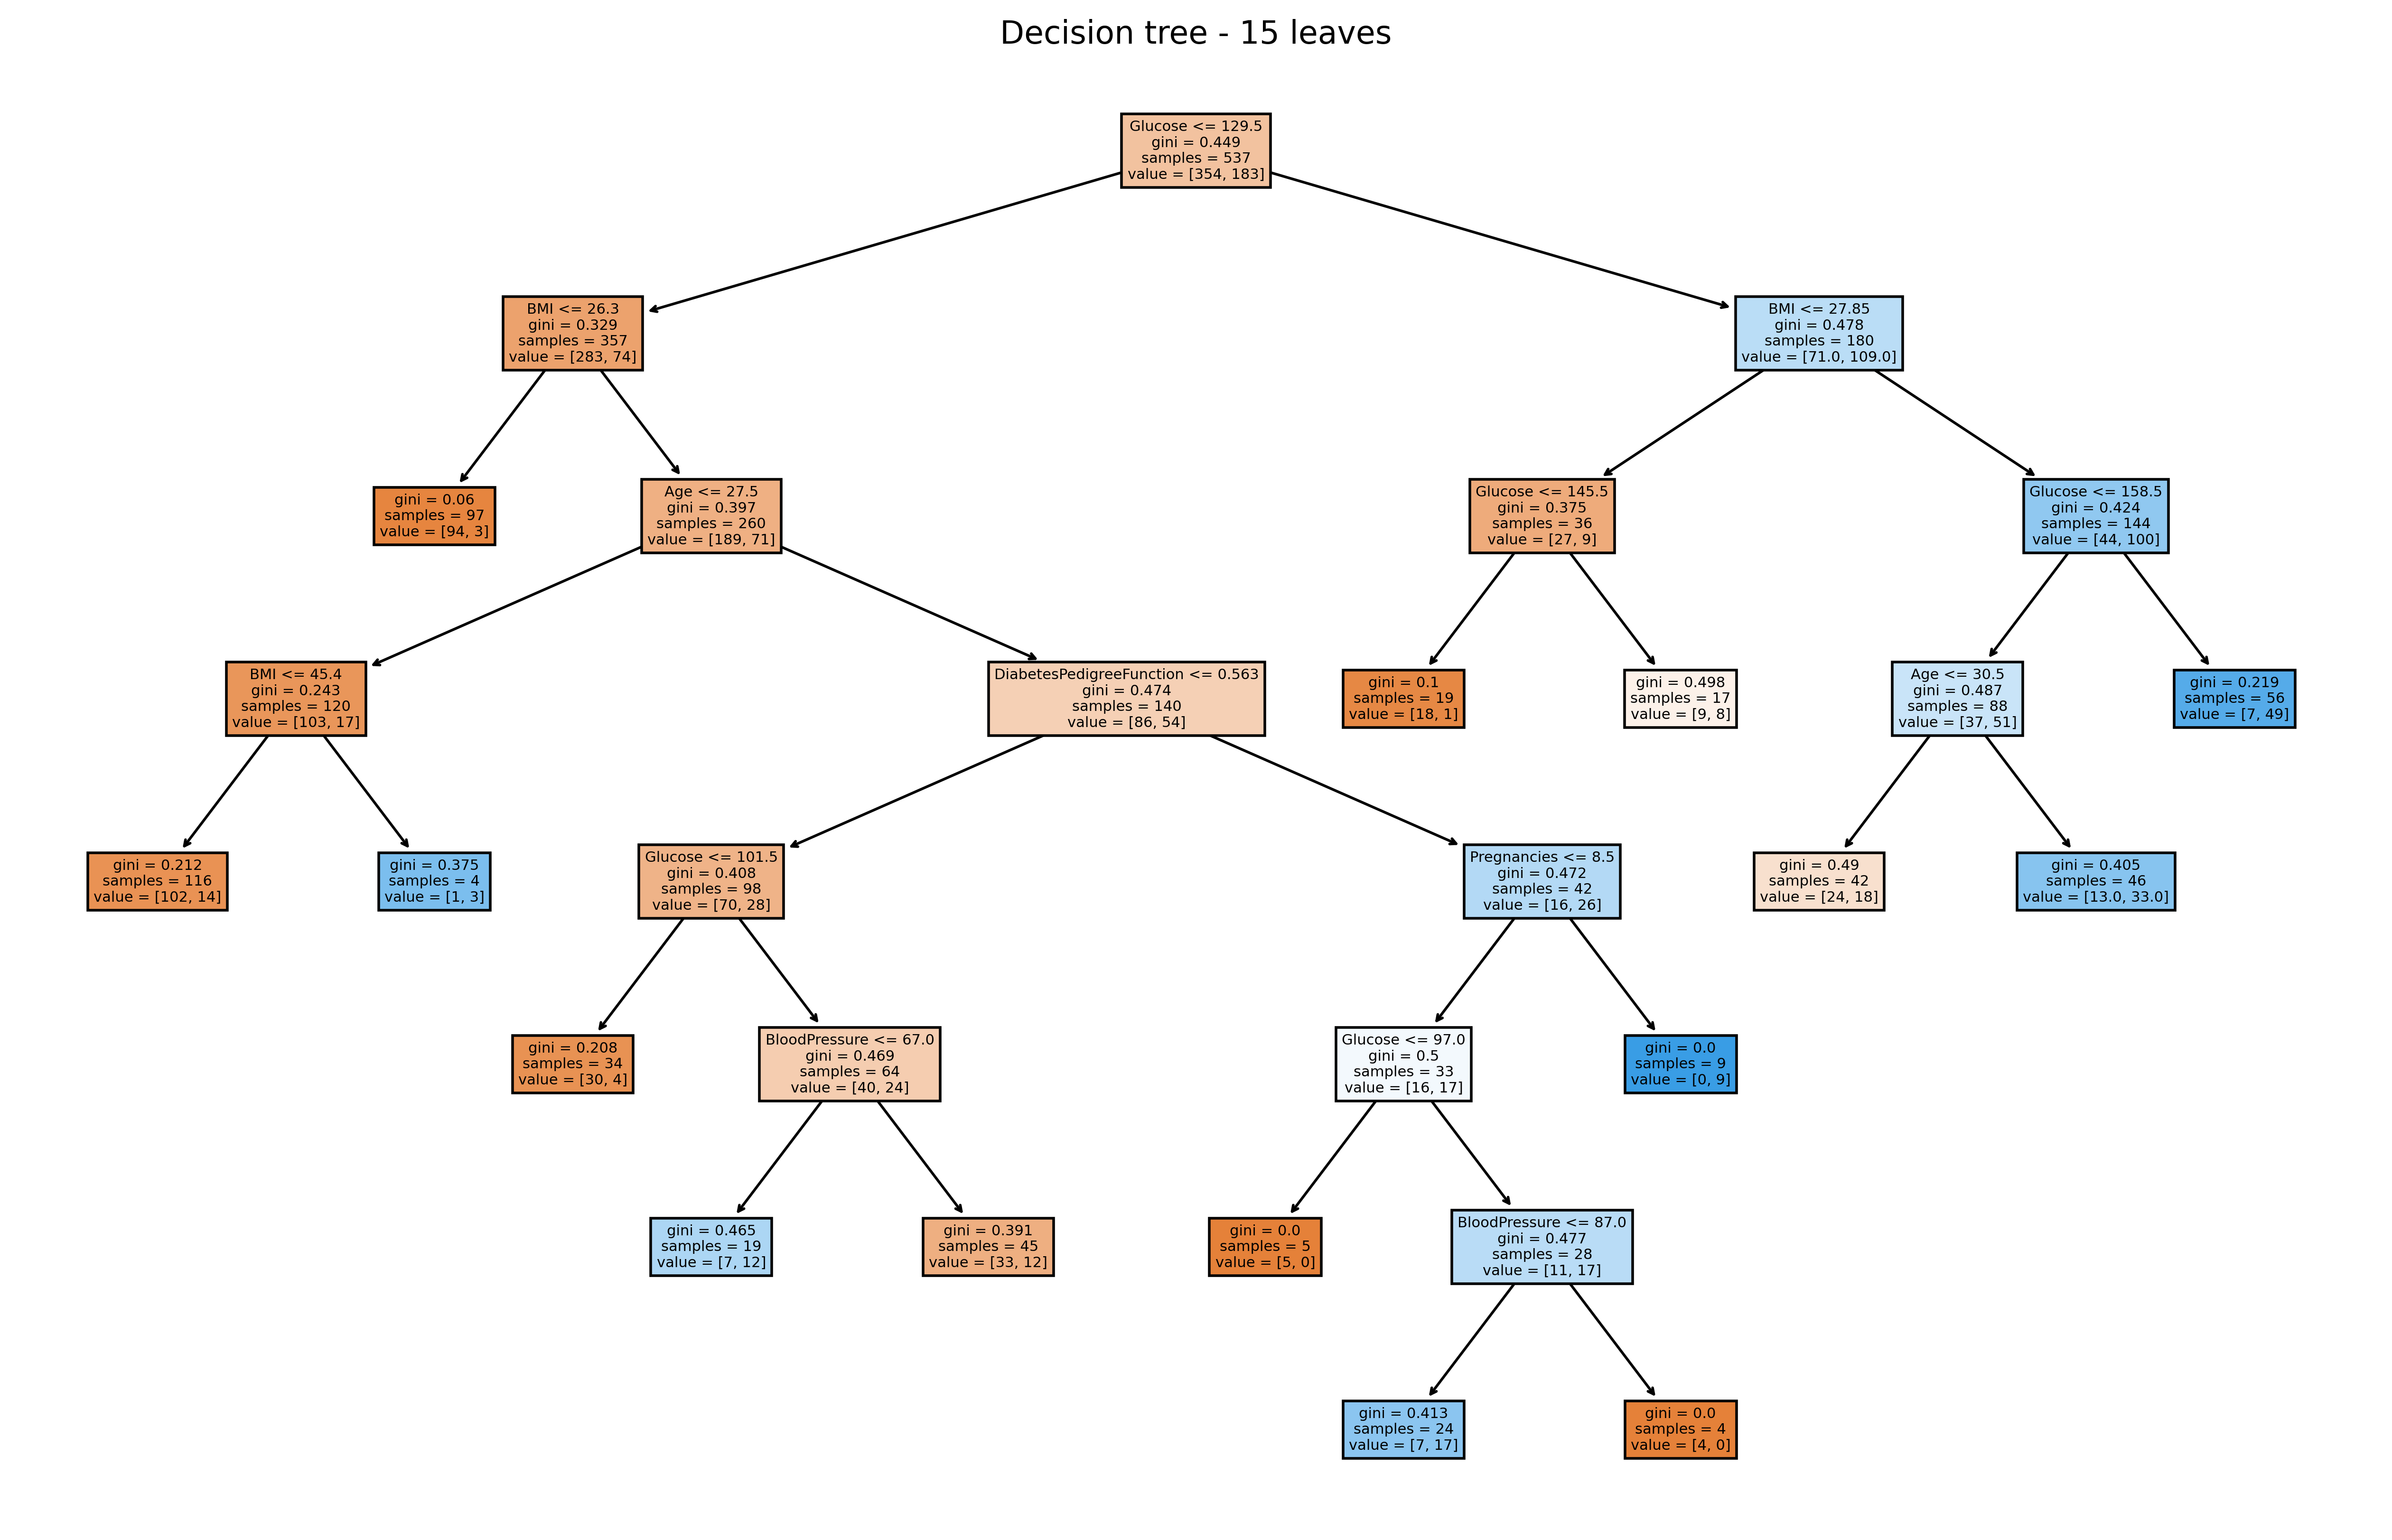

In [250]:
plt.figure(figsize=(16,10), dpi=400)
tree.plot_tree(dt2, filled=True, feature_names=X_train.columns)
plt.title("Decision tree - 15 leaves")
plt.show()

This is a much simpler tree, with an improved performance!

**Discussion Question**  
- Why the simpler tree performs better than the original one?

**Exercise (Optional)**   
- Which are the most important features in the prunned tree?

Another option is to grow a big tree, and then prune it using a regularizer, as cost-complexity prunning. It has one only parameter $\alpha$.

**TODO** Try different values for $\alpha$ values and observe the training and testing accuracy

Train Accuracy: 0.7821229050279329
Test Accuracy: 0.7705627705627706


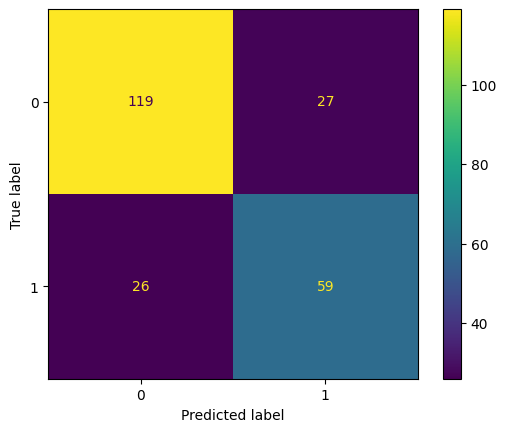

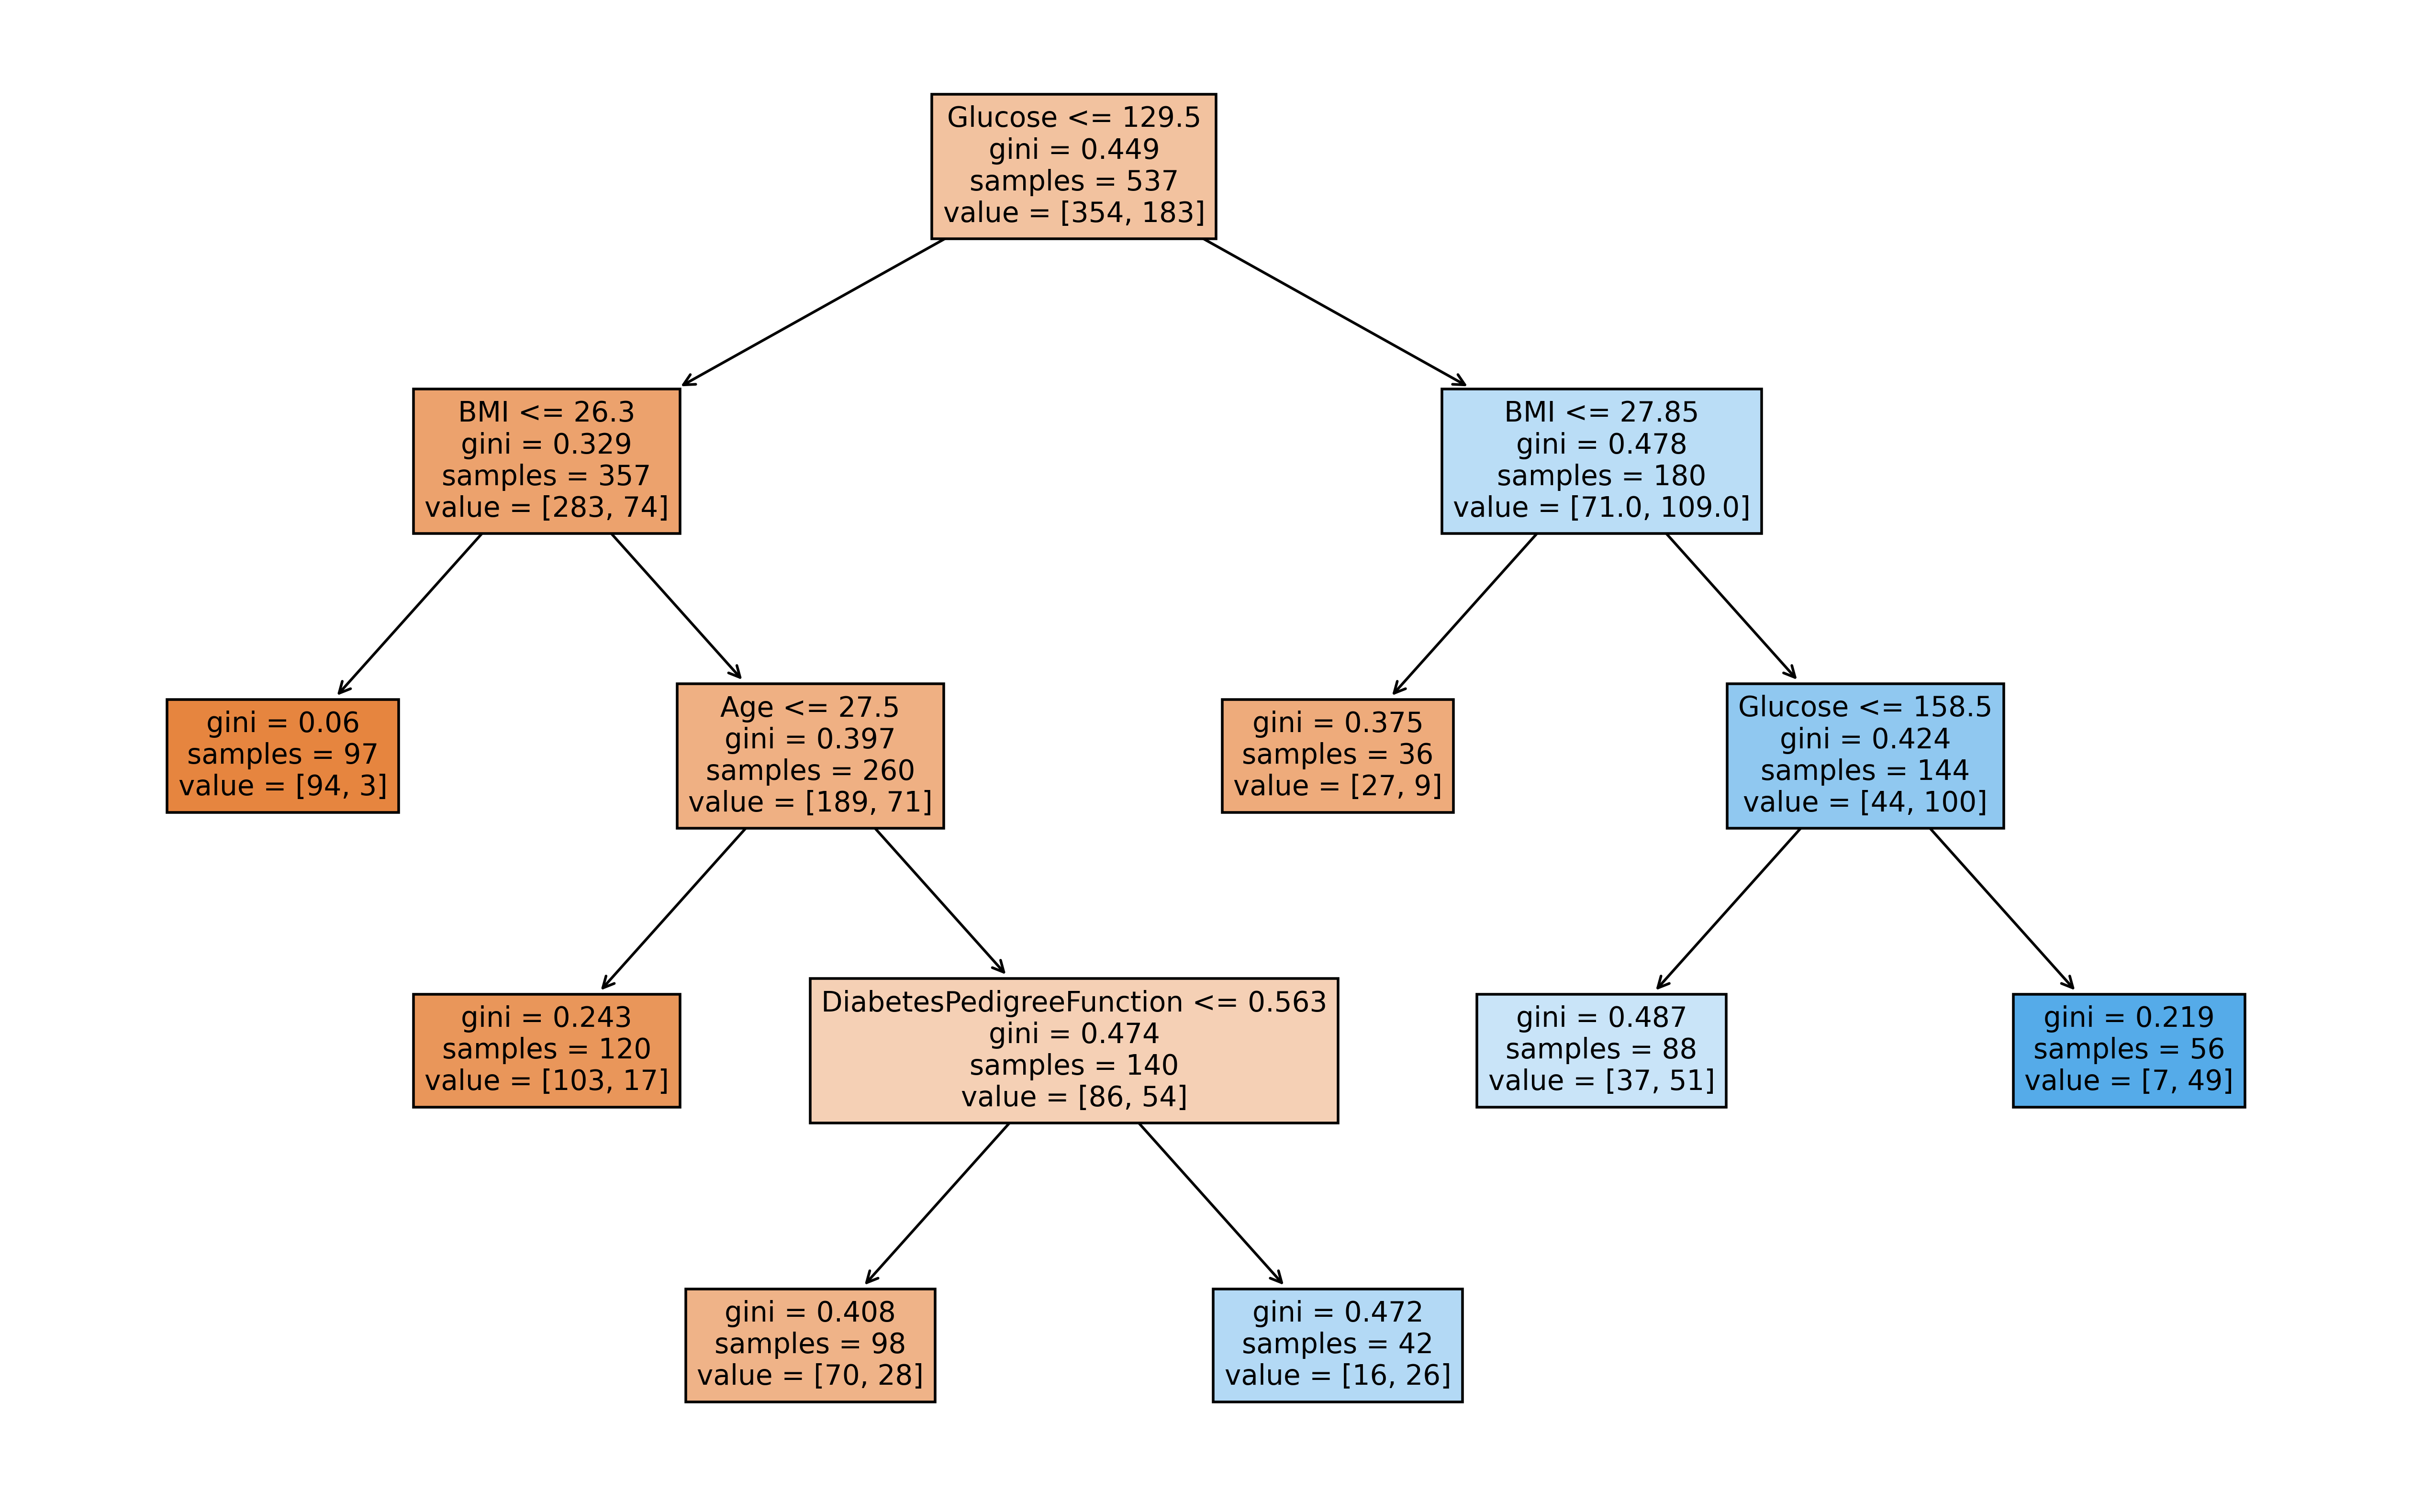

In [264]:
dt3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
# Train with the training dataset
dt3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt3.predict(X_test)
y_pred_train = dt3.predict(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

plt.figure(figsize=(16,10), dpi=400)
_ = tree.plot_tree(dt3, filled=True, feature_names=X_train.columns)

The prunned tree further improved the prediction accuracy in the test set.

> **Discussion question**
>
> - What is different between pre-prunning and post-prunning methods?   

## 5. Hyper-parameter tuning of Decision Trees with Cross-Validation

To fine-tune the Decision Tree hyper-parameters there are several options. While one can experiment maunally, sometimes we need a more systematic approach.

Below we demonstrate how to perform an exhaustive search of the hyper-parameter space using cross validation, with the `GridSearchCV` class. 

**Example 1**: Tune only one hyperparameter    
In this case, we will tune only one hyper parameter, the number of terminal nodes, by controlling the `max_leaf_nodes`. 

One could write a `for` loop, as below.

In [265]:
results = [] 

for mtl in range(5, 30):
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(max_leaf_nodes = mtl, random_state=0)
    # Train with the training dataset
    dt.fit(X_train,y_train)
    #Predict the response for training and test set
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    #Estimate a performance metric
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    results.append({'leaves':mtl, 'acc_train':acc_train, 'acc_test':acc_test})
    # print("leaves", mtl, "- Training accuracy:", acc_train, " - Test accuracy", acc_test)
    
results = pd.DataFrame(results)
results

,leaves,acc_train,acc_test
0,5,0.763501,0.757576
1,6,0.782123,0.770563
2,7,0.782123,0.770563
3,8,0.793296,0.770563
4,9,0.793296,0.770563
5,10,0.793296,0.770563
6,11,0.802607,0.779221
7,12,0.810056,0.766234
8,13,0.813780,0.766234
9,14,0.813780,0.766234


And plot the results as a line plot.
Either use seaborns `sns.lineplot` alternatively, you can also use matplotlib's `plt.plot()` functions

<Axes: xlabel='leaves'>

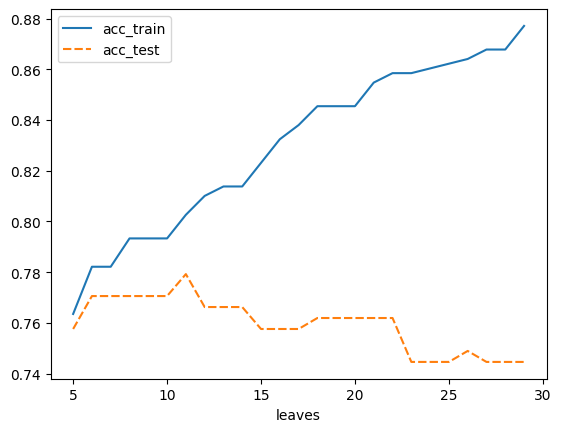

In [266]:
import seaborn as sns
sns.lineplot(data=results.set_index("leaves"))

**TODO What is the optimal number of leafs?**


However, this answer is biased as we used only one test-split. 
Repeating the process accross several folds, will provide with more robust results. 

## Automated Hyperparameter tuning with Sklearn

Let's use the [`GridSearchCV` class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) that performs a exhaustive search over a grid of hyperparameter using cross validation. It allows to `fit` it over the dataset, and get the best classifier.

Here how it works:

In [273]:
#TODO import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Lets first create a decision tree classifier
dt = DecisionTreeClassifier()

# TODO: Define a hyperparameter space with the format
# hyperparameters = {"<variable name>": "list of values to test"}
# note, you can define a of increasing integers with the range(start, stop) function

hyperparameters = {"max_leaf_nodes": range(5, 100, 1)}

dt_cv = GridSearchCV(dt, hyperparameters,
                     cv= 10,
                     verbose = True)

# TODO: fit the GridSearchCV to the X_train, y_train by calling fit on this dt_cv object
# It executes the exhastive search
dt_cv.fit(X_train, y_train)

# These variables will be available after the dt_cv object is fitted to the data
print("Best hyperparameters", dt_cv.best_params_)
print("Best score",  dt_cv.best_score_)

Fitting 10 folds for each of 95 candidates, totalling 950 fits
Best hyperparameters {'max_leaf_nodes': 15}
Best score 0.7393081761006289


Now lets plot the results

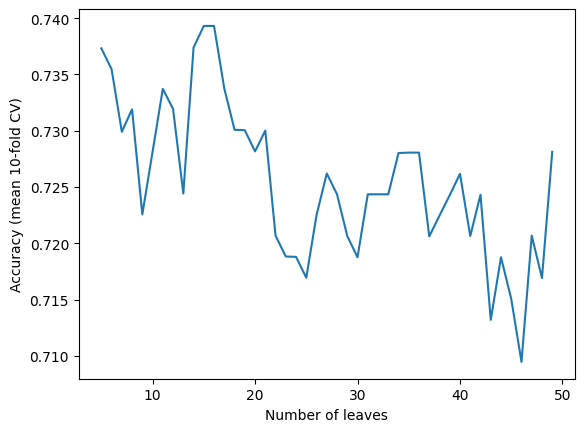

In [272]:
plt.figure()
sns.lineplot(y= dt_cv.cv_results_["mean_test_score"], x=dt_cv.cv_results_['param_max_leaf_nodes'].data)
plt.xlabel("Number of leaves")
plt.ylabel("Accuracy (mean 10-fold CV)")
plt.show()


And the performance on the test set is as follows

Accuracy: 0.7575757575757576


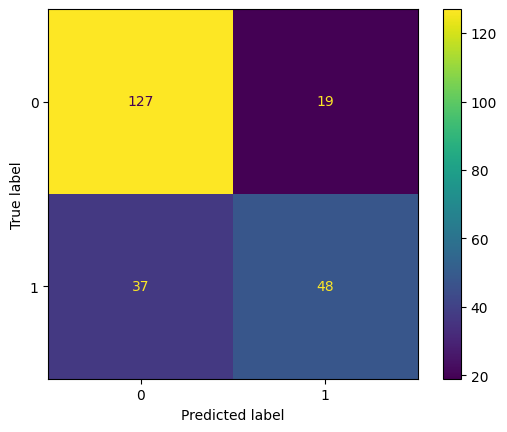

In [274]:
y_pred = dt_cv.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


**Example 2**: Tune several hyperparameters

The nice implementation of `GridSearchCV` allows to search over several 
hyperparamters. 

However, this is exponentially complex: the more parameters values you use, the more slow the fitting becomes. 

The cell below is still relatively fast, as despite using more hyperparamters, the grid is rather sparce.


In [279]:
# Lets first create a decision tree classifier
dt = DecisionTreeClassifier()

# TODO: Now define a hyperparameter space including
# * the 'criterion' as either `gini` or `entropy`
# * the 'min_samples_leaf' as either `1` or `8`
# * the 'max_leaf_nodes' as [None, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29] (you can also implement this list as "[None]+list(range(5,30,2))")

hyperparameters = {"criterion": ["gini", "entropy"], "min_samples_leaf": [1, 8], "max_leaf_nodes":range(5,30,2)}

dt_cv = GridSearchCV(dt, hyperparameters,
                     cv= 10,
                     verbose = True)

# TODO: Execute the exhaustive search again here by calling .fit on X_train, y_train

dt_cv.fit(X_train, y_train)
# Inspect the best model, and evaluate it with the test set
# These variables will be available after the dt_cv object is fitted to the data
print("Best hyperparameters", dt_cv.best_params_)
print("Best score",  dt_cv.best_score_)


Fitting 10 folds for each of 52 candidates, totalling 520 fits
Best hyperparameters {'criterion': 'entropy', 'max_leaf_nodes': 9, 'min_samples_leaf': 8}
Best score 0.7412299091544374


Accuracy: 0.7748917748917749


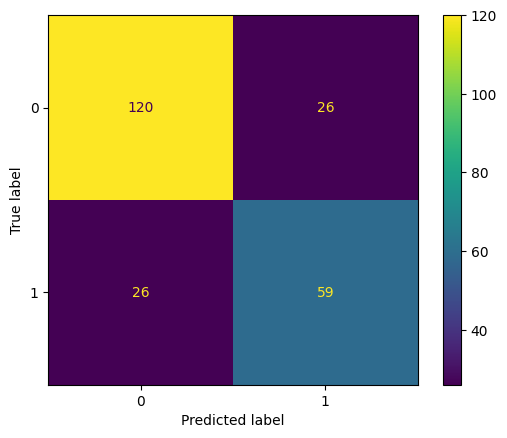

In [280]:
y_pred = dt_cv.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

> **Discussion Question**
>
> - How did your final model perform?
> - What other factors may affect your model selection process? 
> - What could you do to overcome those?
> - If you spend a lot of the hyperparameter extensively and observe visually the test result. How do you bias the result. Would it make sense to keep a completely different test set that you never see during the hyperparameter tuning?